continuous model : 

a = 
-3.33333 0.0 0.0 0.0 
0.0 -2.0 0.0 0.0 
1.0 0.0 0.0 0.0 
0.0 1.0 0.0 0.0 

b = 
4.5 4.5 
1.4 -1.4 
0.0 0.0 
0.0 0.0 

c = 
1.0 0.0 0.0 0.0 
0.0 1.0 0.0 0.0 
0.0 0.0 1.0 0.0 
0.0 0.0 0.0 1.0 


u =  [[1.]
 [1.]]


<Figure size 640x480 with 0 Axes>

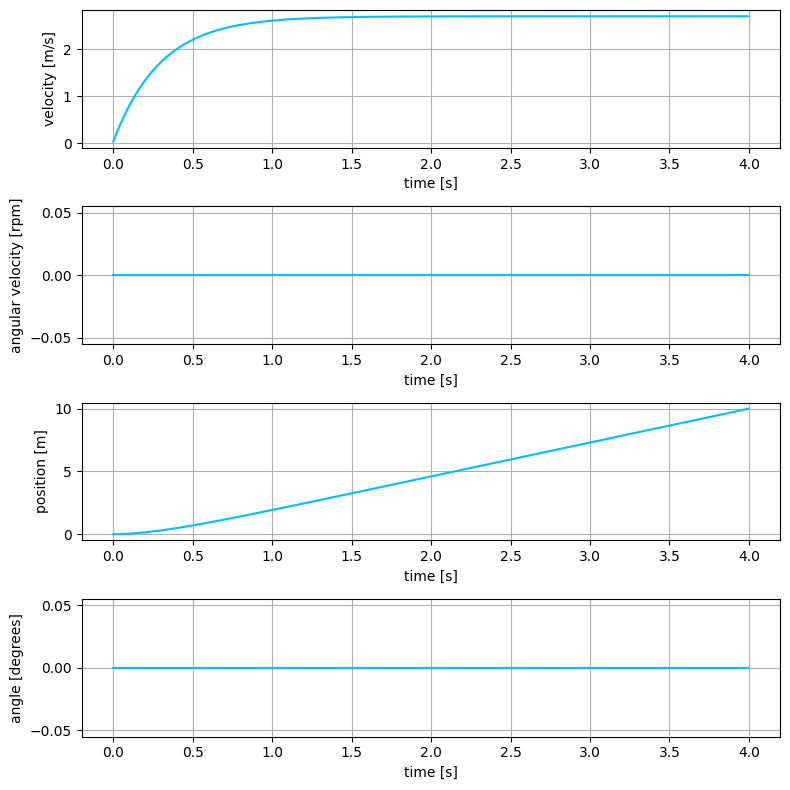

In [2]:
import numpy
import matplotlib.pyplot as plt
import LibsControl

import robot_model

#sampling frequency, 250Hz
dt       = 1.0/250.0


robot_model = robot_model.RobotModel(dt)

ds   = LibsControl.DynamicalSystem(robot_model.mat_a, robot_model.mat_b, dt=dt)


print(str(ds))


steps = 1000
t_result = numpy.arange(steps)*dt
#plot system open loop step response
u_result, x_result, y_result = ds.step_response(amplitude = 1, steps=steps)

y_result[:, 1]*= 60.0/(2.0*numpy.pi) #convert rad/s to rpm
y_result[:, 3]*= 360.0/(2.0*numpy.pi) #convert rad to degrees
LibsControl.plot_open_loop_response(t_result, y_result, "results/open_loop_response", labels=["velocity [m/s]", "angular velocity [rpm]", "position [m]", "angle [degrees]"])


controller


k=
 [[  0.9994859    2.23837008   7.82699399  11.49116101]
 [  0.9994859   -2.23837008   7.82699399 -11.49116101]] 

ki=
 [[  0.           0.          22.36067977  22.36067977]
 [  0.           0.          22.36067977 -22.36067977]] 






<Figure size 640x480 with 0 Axes>

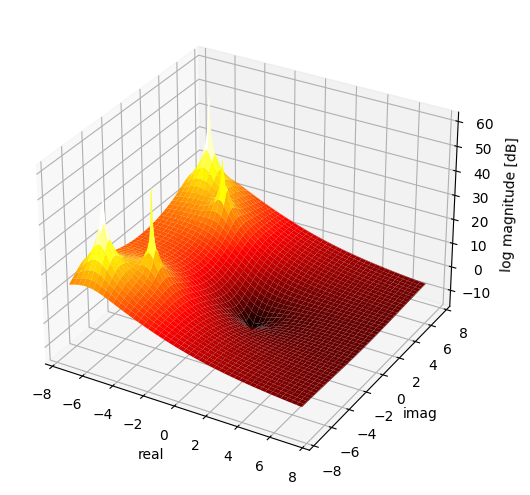

In [3]:
dp = 1.0
ap = 1.0
ep = 0.001

q = numpy.array([ [0.0, 0.0, 0.0, 0.0], 
                  [0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, dp, 0.0],
                  [0.0, 0.0, 0.0, ap] ] )

r = numpy.array( [  [ep,    0.0],
                    [0.0,   ep] ]) 

lqri = LibsControl.LQRISolver(ds.mat_a, ds.mat_b, ds.mat_c, q, r, dt)

k, ki    = lqri.solve()


#print solved controller matrices
print("controller\n\n")
print("k=\n", k, "\n")
print("ki=\n", ki, "\n")
print("\n\n")


#plot poles, both : open and closed loop
re_ol, im_ol, re_cl, im_cl = LibsControl.get_poles(ds.mat_a, ds.mat_b, k)
LibsControl.plot_poles(re_ol, im_ol, re_cl, im_cl, "results/poles.png")

ranges, poles = LibsControl.get_poles_mesh(ds.mat_a, ds.mat_b, ds.mat_c)
LibsControl.plot_poles_mesh(ranges, poles, "results/poles_mesh_ol.png")

ranges, poles = LibsControl.get_poles_mesh(ds.mat_a - ds.mat_b@k, ds.mat_b, ds.mat_c)
LibsControl.plot_poles_mesh(ranges, poles, "results/poles_mesh_cl.png")



<Figure size 640x480 with 0 Axes>

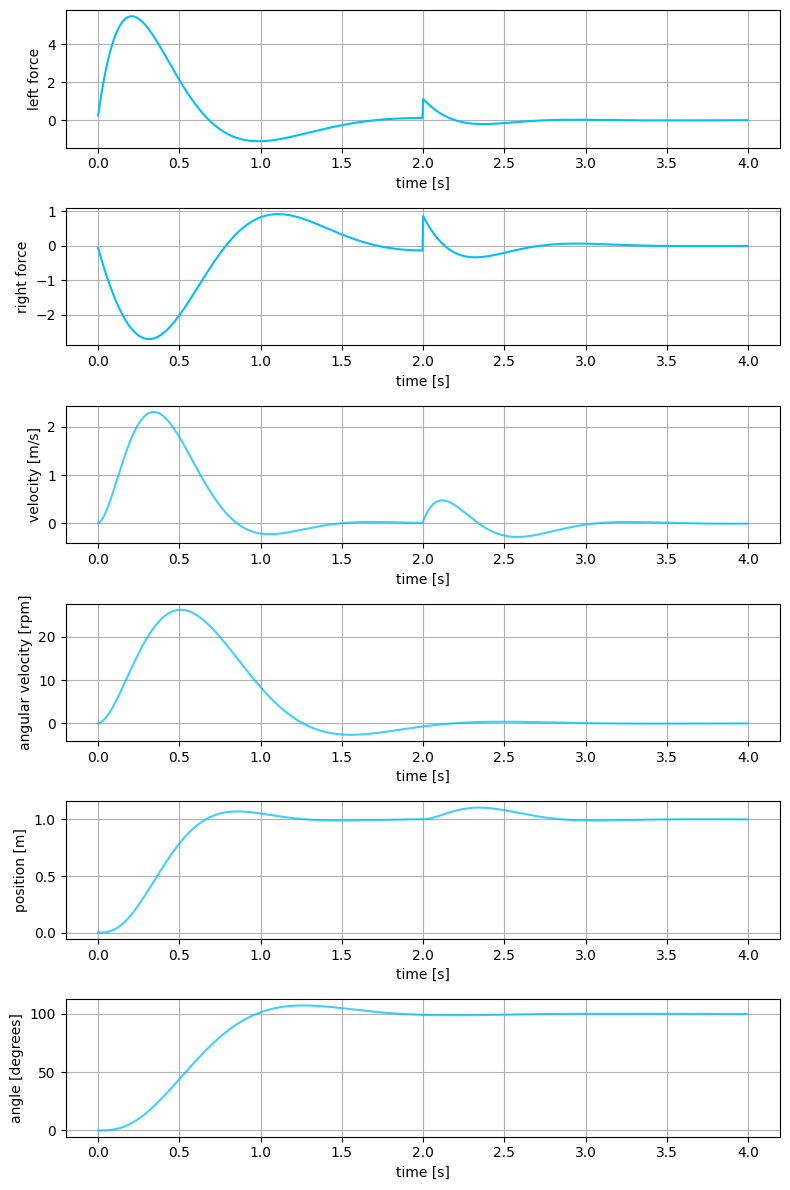

In [4]:
#required state, distance 1m, angle 100degrees
xr = numpy.array([[0.0, 0.0, 1.0, 100.0*numpy.pi/180.0]]).T

#step response
u_result, x_result, y_result, = lqri.closed_loop_response(xr, steps, disturbance = True)


x_result[:, 1]*= 60.0/(2.0*numpy.pi) #convert rad/s to rpm
x_result[:, 3]*= 360.0/(2.0*numpy.pi) #convert rad to degrees


LibsControl.plot_closed_loop_response(t_result, u_result, x_result, file_name = "results/closed_loop_response.png", u_labels = ["left force", "right force"], x_labels=["velocity [m/s]", "angular velocity [rpm]", "position [m]", "angle [degrees]"] )

   